 # 富士下山問題

In [2]:
cd data

/Users/niikurasayaka/diveintocode-ml/Week2/classwork/data


In [3]:
import numpy as np

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


In [4]:
import pandas as pd
df = pd.DataFrame(fuji, columns=["地点番号", "緯度", "経度", "標高", "地点０からの距離"])

In [5]:
df

,地点番号,緯度,経度,標高,地点０からの距離
0,0.0,35.134141,139.132082,0.00,0.0
1,1.0,35.135826,139.129202,0.00,322.0
2,2.0,35.137510,139.126322,0.00,644.0
3,3.0,35.139194,139.123441,0.00,966.0
4,4.0,35.140878,139.120560,0.00,1288.0
...,...,...,...,...,...
295,295.0,35.627957,138.277199,1918.24,95054.0
296,296.0,35.629620,138.274284,1944.63,95376.0
297,297.0,35.631284,138.271368,1973.99,95698.0
298,298.0,35.632947,138.268452,1841.36,96020.0


<b>【問題1】データの可視化</b>

Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

Text(0, 0.5, 'elevation')

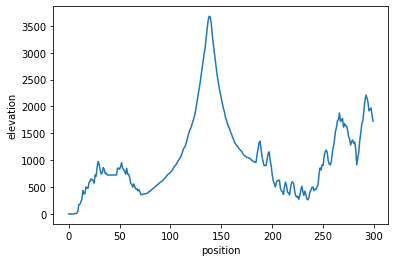

In [6]:
x = df["地点番号"]
y = df["標高"]
import matplotlib.pyplot as plt
import numpy as np
plt.plot(x, y)
plt.xlabel('position')
plt.ylabel('elevation')

<b>【問題2】ある地点の勾配を計算する関数を作成</b>
    
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。

勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。



In [7]:
x_v = x.values
y_v = y.values
xy_v = np.vstack((x_v, y_v)).T
xy_v

array([[   0.  ,    0.  ],
       [   1.  ,    0.  ],
       [   2.  ,    0.  ],
       [   3.  ,    0.  ],
       [   4.  ,    0.  ],
       [   5.  ,    0.  ],
       [   6.  ,    6.62],
       [   7.  ,    7.21],
       [   8.  ,   12.2 ],
       [   9.  ,   54.41],
       [  10.  ,  171.56],
       [  11.  ,  177.84],
       [  12.  ,  228.21],
       [  13.  ,  275.38],
       [  14.  ,  433.76],
       [  15.  ,  371.74],
       [  16.  ,  380.06],
       [  17.  ,  503.4 ],
       [  18.  ,  485.39],
       [  19.  ,  477.82],
       [  20.  ,  580.5 ],
       [  21.  ,  610.92],
       [  22.  ,  654.96],
       [  23.  ,  628.22],
       [  24.  ,  626.64],
       [  25.  ,  572.55],
       [  26.  ,  723.95],
       [  27.  ,  701.94],
       [  28.  ,  879.47],
       [  29.  ,  976.17],
       [  30.  ,  919.16],
       [  31.  ,  817.  ],
       [  32.  ,  743.06],
       [  33.  ,  770.92],
       [  34.  ,  864.06],
       [  35.  ,  826.52],
       [  36.  ,  748.39],
 

In [8]:
def grad(x_now, data):
    dx = data[x_now][0] - data[x_now-1][0]
    dy = data[x_now][1] - data[x_now-1][1]
    return dy / dx

In [9]:
grad(136, xy_v)

168.35000000000036

<b>【問題3】移動先の地点を計算する関数を作成</b>

今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと 「移動先の地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。

「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

《実装上の注意》

上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

《ハイパーパラメータとは》

機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [10]:
def move_position(x_now, data, a):
    return int(round(x_now - (a * grad(x_now, data)), 0))

In [11]:
a=0.1
move_position(136, xy_v, a)

119

<b>【問題4】山を下る関数を作成</b>

山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。

最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

《実装上の注意》

問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [17]:
def decending_process(x_now, data, a):
    position_list = [x_now]
    now_height = data[x_now][1]
    for i in range(10000):
        next_position = move_position(x_now, data, a)
        next_height = data[next_position][1]
        if  now_height <= next_height:
            return position_list
            break
        else:
            position_list.append(next_position)
            x_now = next_position
            now_height = next_height

<b>【問題5】下山過程の可視化</b>

問題4における下山過程をMatplotlibを使いグラフで可視化してください。

《可視化例》

断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする

In [18]:
x_plot = decending_process(136, xy_v, a)
y_plot = []
for i in x_plot:
    y_plot.append(xy_v[i][1])
print('x : ', x_plot)
print('y : ', y_plot)


x :  [136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]
y :  [3434.59, 1561.94, 1219.86, 1000.24, 910.5, 817.62, 772.58, 741.17, 700.15, 631.71, 602.36, 588.99, 575.07, 536.54, 505.1, 471.82, 458.66, 420.6]


In [19]:
x = df["地点番号"]
y = df["標高"]

import matplotlib.pyplot as plt
import numpy as np

def plot_fuji(x_plot, y_plot, c, marker):
    plt.plot(x, y)
    plt.xlabel('position')
    plt.ylabel('elevation')
    plt.scatter(x_plot, y_plot, color=c, marker=marker)
    plt.show()

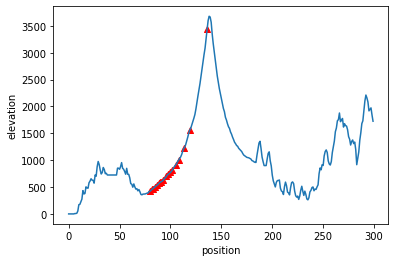

In [20]:
plot_fuji(x_plot, y_plot, 'r', '^')

<b>【問題6】初期値の変更</b>
    
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

《初期値とは》

今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

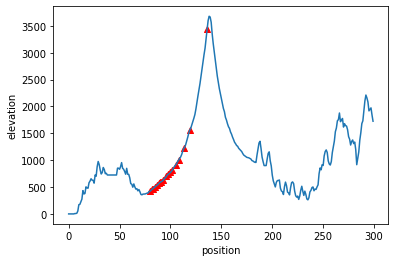

In [595]:
#地点１３６の時
plot_fuji(x_plot, y_plot, 'r', '^')

In [22]:
x_plot = down(142, xy_v, a)
y_plot = []
for i in x_plot:
    y_plot.append(xy_v[i][1])
print('x : ', x_plot)
print('y : ', y_plot)

x :  [142, 160, 164, 167, 171, 175, 176]
y :  [3171.53, 1484.72, 1306.46, 1222.48, 1124.83, 1053.28, 1049.33]


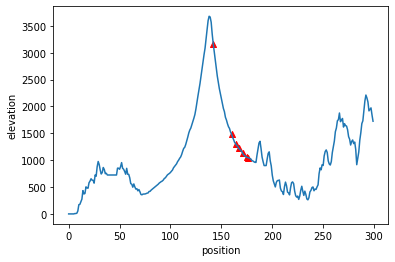

In [23]:
#地点１４２の時
plot_fuji(x_plot, y_plot, 'r', '^')

<b>【問題7】（アドバンス問題）ハイパーパラメータの変更</b>

ハイパーパラメータ 
α
 を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

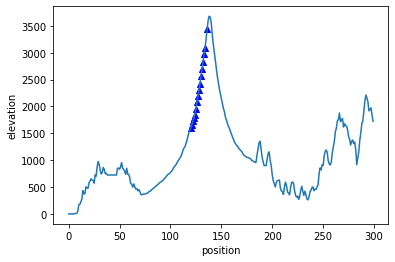

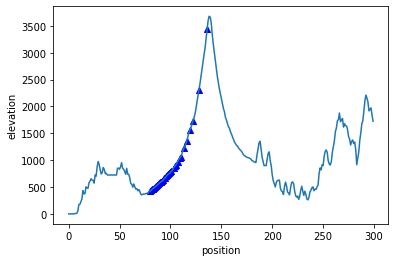

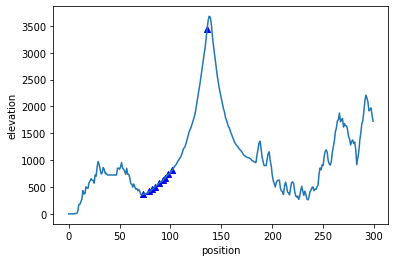

In [25]:
#136地点でハイパラメータaを0.01, 0.05, 0.2の３つでそれぞれ図示
x_now = 136
a_list = [0.01, 0.05, 0.2]
for a in a_list:
    x_plot = down(x_now, xy_v, a)
    y_plot = []
    for i in x_plot:
        y_plot.append(xy_v[i][1])
    plot_fuji(x_plot, y_plot, 'b', '^')